Alberto Marban adapted this notebook from Cedillo-González, R., & Medina-Franco, J. L. (2023). Diversity and Chemical Space Characterization of Inhibitors of the Epigenetic Target G9a: A Chemoinformatics Approach. ACS Omega, 8(33), 30694–30704. https://doi.org/10.1021/acsomega.3c04566

# **Cumulative similarity distribution**

## **Configure the environment**

In [4]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

### **Mount data sets**

In [5]:
INDDB = pd.read_excel("INDDS.xlsx")

PYRDB = pd.read_excel("PYRDS.xlsx")

DIADB = pd.read_excel("DIADS.xlsx")

SADB = pd.read_excel("STADS.xlsx")


In [6]:
print(INDDB.shape)
print(PYRDB.shape)
print(DIADB.shape)
print(SADB.shape)

(78657, 1)
(58147, 1)
(35222, 2)
(217, 4)


In [4]:
print(INDDB.columns)
print(PYRDB.columns)
print(DIADB.columns)
print(SADB.columns)

Index(['NEW_SMILES'], dtype='object')
Index(['NEW_SMILES'], dtype='object')
Index(['NEW_SMILES'], dtype='object')
Index(['Unnamed: 0', 'NEW_SMILES', 'pIC50', 'molecule_chembl_id', 'exactmw',
       'amw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds', 'NumHBD',
       ...
       'bit2038', 'bit2039', 'bit2040', 'bit2041', 'bit2042', 'bit2043',
       'bit2044', 'bit2045', 'bit2046', 'bit2047'],
      dtype='object', length=2095)


In [5]:
INDDB = INDDB[["NEW_SMILES"]]
PYRDB = PYRDB[["NEW_SMILES"]]
DIADB = DIADB[["NEW_SMILES"]]
SADB = SADB[["NEW_SMILES"]]

In [6]:
INDDB.columns = ['SMILES']
PYRDB.columns = ['SMILES']
DIADB.columns = ['SMILES']
SADB.columns = ['SMILES']

**Random selection of a subset from INDDB**

In [7]:
print(f'initial shape: {INDDB.shape}') 

# First sample
INDDB_1 = INDDB.sample(n=1000, random_state=1)
INDDB = INDDB.drop(INDDB_1.index)
INDDB_1.reset_index(drop=True, inplace=True)
INDDB.reset_index(drop=True, inplace=True)
print(f'first sample: {INDDB.shape}')

# Second sample
INDDB_2 = INDDB.sample(n=1000, random_state=1)
INDDB = INDDB.drop(INDDB_2.index)
INDDB_2.reset_index(drop=True, inplace=True)
INDDB.reset_index(drop=True, inplace=True)
print(f'second sample: {INDDB.shape}')

# Third sample
INDDB_3 = INDDB.sample(n=1000, random_state=1)
INDDB = INDDB.drop(INDDB_3.index)
INDDB_3.reset_index(drop=True, inplace=True)
INDDB.reset_index(drop=True, inplace=True)
print(f'third sample: {INDDB.shape}')

# Fourth sample
INDDB_4 = INDDB.sample(n=1000, random_state=1)
INDDB = INDDB.drop(INDDB_4.index)
INDDB_4.reset_index(drop=True, inplace=True)
INDDB.reset_index(drop=True, inplace=True)
print(f'fourth sample: {INDDB.shape}')

# Fifth sample
INDDB_5 = INDDB.sample(n=1000, random_state=1)
INDDB = INDDB.drop(INDDB_5.index)
INDDB_5.reset_index(drop=True, inplace=True)
INDDB.reset_index(drop=True, inplace=True)
print(f'fifth sample: {INDDB.shape}')



initial shape: (78657, 1)
first sample: (77657, 1)
second sample: (76657, 1)
third sample: (75657, 1)
fourth sample: (74657, 1)
fifth sample: (73657, 1)


In [8]:
# Concatenate all samples
INDDB = pd.concat([INDDB_1, INDDB_2, INDDB_3, INDDB_4, INDDB_5], ignore_index=True)
print(f'Final concatenated shape: {INDDB.shape}')

Final concatenated shape: (5000, 1)


In [9]:
INDDB.shape

(5000, 1)

#### **Random selection of a subset from PYRDB**



In [10]:
print(f'initial shape: {PYRDB.shape}') 

# First sample
PYRDB_1 = PYRDB.sample(n=1000, random_state=1)
PYRDB = PYRDB.drop(PYRDB_1.index)
PYRDB_1.reset_index(drop=True, inplace=True)
PYRDB.reset_index(drop=True, inplace=True)
print(f'first sample: {PYRDB.shape}')

# Second sample
PYRDB_2 = PYRDB.sample(n=1000, random_state=1)
PYRDB = PYRDB.drop(PYRDB_2.index)
PYRDB_2.reset_index(drop=True, inplace=True)
PYRDB.reset_index(drop=True, inplace=True)
print(f'second sample: {PYRDB.shape}')

# Third sample
PYRDB_3 = PYRDB.sample(n=1000, random_state=1)
PYRDB = PYRDB.drop(PYRDB_3.index)
PYRDB_3.reset_index(drop=True, inplace=True)
PYRDB.reset_index(drop=True, inplace=True)
print(f'third sample: {PYRDB.shape}')

# Fourth sample
PYRDB_4 = PYRDB.sample(n=1000, random_state=1)
PYRDB = PYRDB.drop(PYRDB_4.index)
PYRDB_4.reset_index(drop=True, inplace=True)
PYRDB.reset_index(drop=True, inplace=True)
print(f'fourth sample: {PYRDB.shape}')

# Fifth sample
PYRDB_5 = PYRDB.sample(n=1000, random_state=1)
PYRDB = PYRDB.drop(PYRDB_5.index)
PYRDB_5.reset_index(drop=True, inplace=True)
PYRDB.reset_index(drop=True, inplace=True)
print(f'fifth sample: {PYRDB.shape}')



initial shape: (58147, 1)
first sample: (57147, 1)
second sample: (56147, 1)
third sample: (55147, 1)
fourth sample: (54147, 1)
fifth sample: (53147, 1)


In [11]:
# Concatenate all samples
PYRDB = pd.concat([PYRDB_1, PYRDB_2, PYRDB_3, PYRDB_4, PYRDB_5], ignore_index=True)
print(f'Final concatenated shape: {PYRDB.shape}')


Final concatenated shape: (5000, 1)


In [12]:
PYRDB.shape

(5000, 1)

#### **Random selection of a subset from DIADB**


In [13]:
print(f'initial shape: {DIADB.shape}') 

# First sample
DIADB_1 = DIADB.sample(n=1000, random_state=1)
DIADB = DIADB.drop(DIADB_1.index)
DIADB_1.reset_index(drop=True, inplace=True)
DIADB.reset_index(drop=True, inplace=True)
print(f'first sample: {DIADB.shape}')

# Second sample
DIADB_2 = DIADB.sample(n=1000, random_state=1)
DIADB = DIADB.drop(DIADB_2.index)
DIADB_2.reset_index(drop=True, inplace=True)
DIADB.reset_index(drop=True, inplace=True)
print(f'second sample: {DIADB.shape}')

# Third sample
DIADB_3 = DIADB.sample(n=1000, random_state=1)
DIADB = DIADB.drop(DIADB_3.index)
DIADB_3.reset_index(drop=True, inplace=True)
DIADB.reset_index(drop=True, inplace=True)
print(f'third sample: {DIADB.shape}')

# Fourth sample
DIADB_4 = DIADB.sample(n=1000, random_state=1)
DIADB = DIADB.drop(DIADB_4.index)
DIADB_4.reset_index(drop=True, inplace=True)
DIADB.reset_index(drop=True, inplace=True)
print(f'fourth sample: {DIADB.shape}')

# Fifth sample
DIADB_5 = DIADB.sample(n=1000, random_state=1)
DIADB = DIADB.drop(DIADB_5.index)
DIADB_5.reset_index(drop=True, inplace=True)
DIADB.reset_index(drop=True, inplace=True)
print(f'fifth sample: {DIADB.shape}')


initial shape: (35222, 1)
first sample: (34222, 1)
second sample: (33222, 1)
third sample: (32222, 1)
fourth sample: (31222, 1)
fifth sample: (30222, 1)


In [14]:
# Concatenate all samples
DIADB = pd.concat([DIADB_1, DIADB_2, DIADB_3, DIADB_4, DIADB_5], ignore_index=True)
print(f'Final concatenated shape: {DIADB.shape}')


Final concatenated shape: (5000, 1)


In [15]:
DIADB.shape

(5000, 1)

In [16]:
SMILES_INDDB = list(INDDB['SMILES'])
SMILES_PYRDB = list(PYRDB['SMILES'])
SMILES_DIADB = list(DIADB['SMILES'])
SMILES_SADB = list(SADB['SMILES'])

## **Functions defining**

In [17]:
def MACCSkeys_fp (smi):
    fps = pd.DataFrame([[int(y) for y in MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)).ToBitString()] for x in smi])
    SimMat = 1 - pdist(fps[[x for x in range(167)]], metric="jaccard") # Similarity Matrix
    return SimMat

In [18]:
def ECFP (smi, r):
    fps = pd.DataFrame([[int(y) for y in AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), r, nBits=2048).ToBitString()] for x in smi])
    SimMat = 1 - pdist(fps[[x for x in range(2048)]], metric="jaccard") # Similarity Matrix
    return SimMat

## **Apply functions and sort results**

In [19]:
SimMACCS_INDDB = np.sort(MACCSkeys_fp(SMILES_INDDB))
SimMACCS_PYRDB = np.sort(MACCSkeys_fp(SMILES_PYRDB))
SimMACCS_DIADB = np.sort(MACCSkeys_fp(SMILES_DIADB))
SimMACCS_SADB = np.sort(MACCSkeys_fp(SMILES_SADB))

In [20]:
SimECFP4_INDDB = np.sort(ECFP(SMILES_INDDB, 2))
SimECFP4_PYRDB = np.sort(ECFP(SMILES_PYRDB, 2))
SimECFP4_DIADB = np.sort(ECFP(SMILES_DIADB, 2))
SimECFP4_SADB = np.sort(ECFP(SMILES_SADB, 2))

[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerator
[11:03:19] DEPRECATION WARNING: please use MorganGenerat

In [21]:
SimECFP6_INDDB = np.sort(ECFP(SMILES_INDDB, 3))
SimECFP6_PYRDB = np.sort(ECFP(SMILES_PYRDB, 3))
SimECFP6_DIADB = np.sort(ECFP(SMILES_DIADB, 3))
SimECFP6_SADB = np.sort(ECFP(SMILES_SADB, 3))

[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerator
[11:18:41] DEPRECATION WARNING: please use MorganGenerat

In [22]:
# calculate the proportional values of samples for MACCS keys
proportionMACCS_INDDB = 1. * np.arange(len(SimMACCS_INDDB)) / (len(SimMACCS_INDDB) - 1)
print(len(proportionMACCS_INDDB))
proportionMACCS_PYRDB = 1. * np.arange(len(SimMACCS_PYRDB)) / (len(SimMACCS_PYRDB) - 1)
print(len(proportionMACCS_PYRDB))
proportionMACCS_DIADB = 1. * np.arange(len(SimMACCS_DIADB)) / (len(SimMACCS_DIADB) - 1)
print(len(proportionMACCS_DIADB))
proportionMACCS_SADB = 1. * np.arange(len(SimMACCS_SADB)) / (len(SimMACCS_SADB) - 1)
print(len(proportionMACCS_SADB))

12497500
12497500
12497500
23436


In [23]:
# calculate the proportional values of samples for ECFP4 y ECFP6
proportionECFP4_INDDB = 1. * np.arange(len(SimECFP4_INDDB)) / (len(SimECFP4_INDDB) - 1)
print(len(proportionECFP4_INDDB))
proportionECFP4_PYRDB = 1. * np.arange(len(SimECFP4_PYRDB)) / (len(SimECFP4_PYRDB) - 1)
print(len(proportionECFP4_PYRDB))
proportionECFP4_DIADB = 1. * np.arange(len(SimECFP4_DIADB)) / (len(SimECFP4_DIADB) - 1)
print(len(proportionECFP4_DIADB))
proportionECFP4_SADB = 1. * np.arange(len(SimECFP4_SADB)) / (len(SimECFP4_SADB) - 1)
print(len(proportionECFP4_SADB))

12497500
12497500
12497500
23436


In [24]:
# calculate the proportional values of samples for ECFP4 y ECFP6
proportionECFP6_INDDB = 1. * np.arange(len(SimECFP6_INDDB)) / (len(SimECFP6_INDDB) - 1)
print(len(proportionECFP6_INDDB))
proportionECFP6_PYRDB = 1. * np.arange(len(SimECFP6_PYRDB)) / (len(SimECFP6_PYRDB) - 1)
print(len(proportionECFP6_PYRDB))
proportionECFP6_DIADB = 1. * np.arange(len(SimECFP6_DIADB)) / (len(SimECFP6_DIADB) - 1)
print(len(proportionECFP6_DIADB))
proportionECFP6_SADB = 1. * np.arange(len(SimECFP6_SADB)) / (len(SimECFP6_SADB) - 1)
print(len(proportionECFP6_SADB))

12497500
12497500
12497500
23436


### **Plot results**

In [25]:
import matplotlib.pyplot as plt

# Set the default font globally
plt.rcParams['font.family'] = 'Arial'

# Figure 1 - MACCSkeys
plt.figure(figsize=(15, 14), dpi = 800)
plt.plot(SimMACCS_INDDB, proportionMACCS_INDDB, label="INDDS", c="#1f77b4", lw=6, linestyle="-")  # A nice blue
plt.plot(SimMACCS_DIADB, proportionMACCS_DIADB, label="DIADS", c="#9467bd", lw=6, linestyle="-")  # A calm purple
plt.plot(SimMACCS_PYRDB, proportionMACCS_PYRDB, label="PYRDS", c="#ff7f0e", lw=6, linestyle="-")  # A vibrant orange
plt.plot(SimMACCS_SADB, proportionMACCS_SADB, label="STADS", c="#d62728", lw=6, linestyle="-")  # A strong red

plt.xlabel('Similarity', fontsize=30, labelpad=10)
plt.ylabel('Cumulative Distribution Fraction', fontsize=30, labelpad=10)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(2.0)

ax.tick_params(axis='both', which='major', pad=5)

plt.xticks(rotation=0, fontsize=35)
plt.yticks(rotation=90, fontsize=35)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=40)
plt.savefig('diversity_maccs.png', bbox_inches='tight', pad_inches=0, dpi=400)


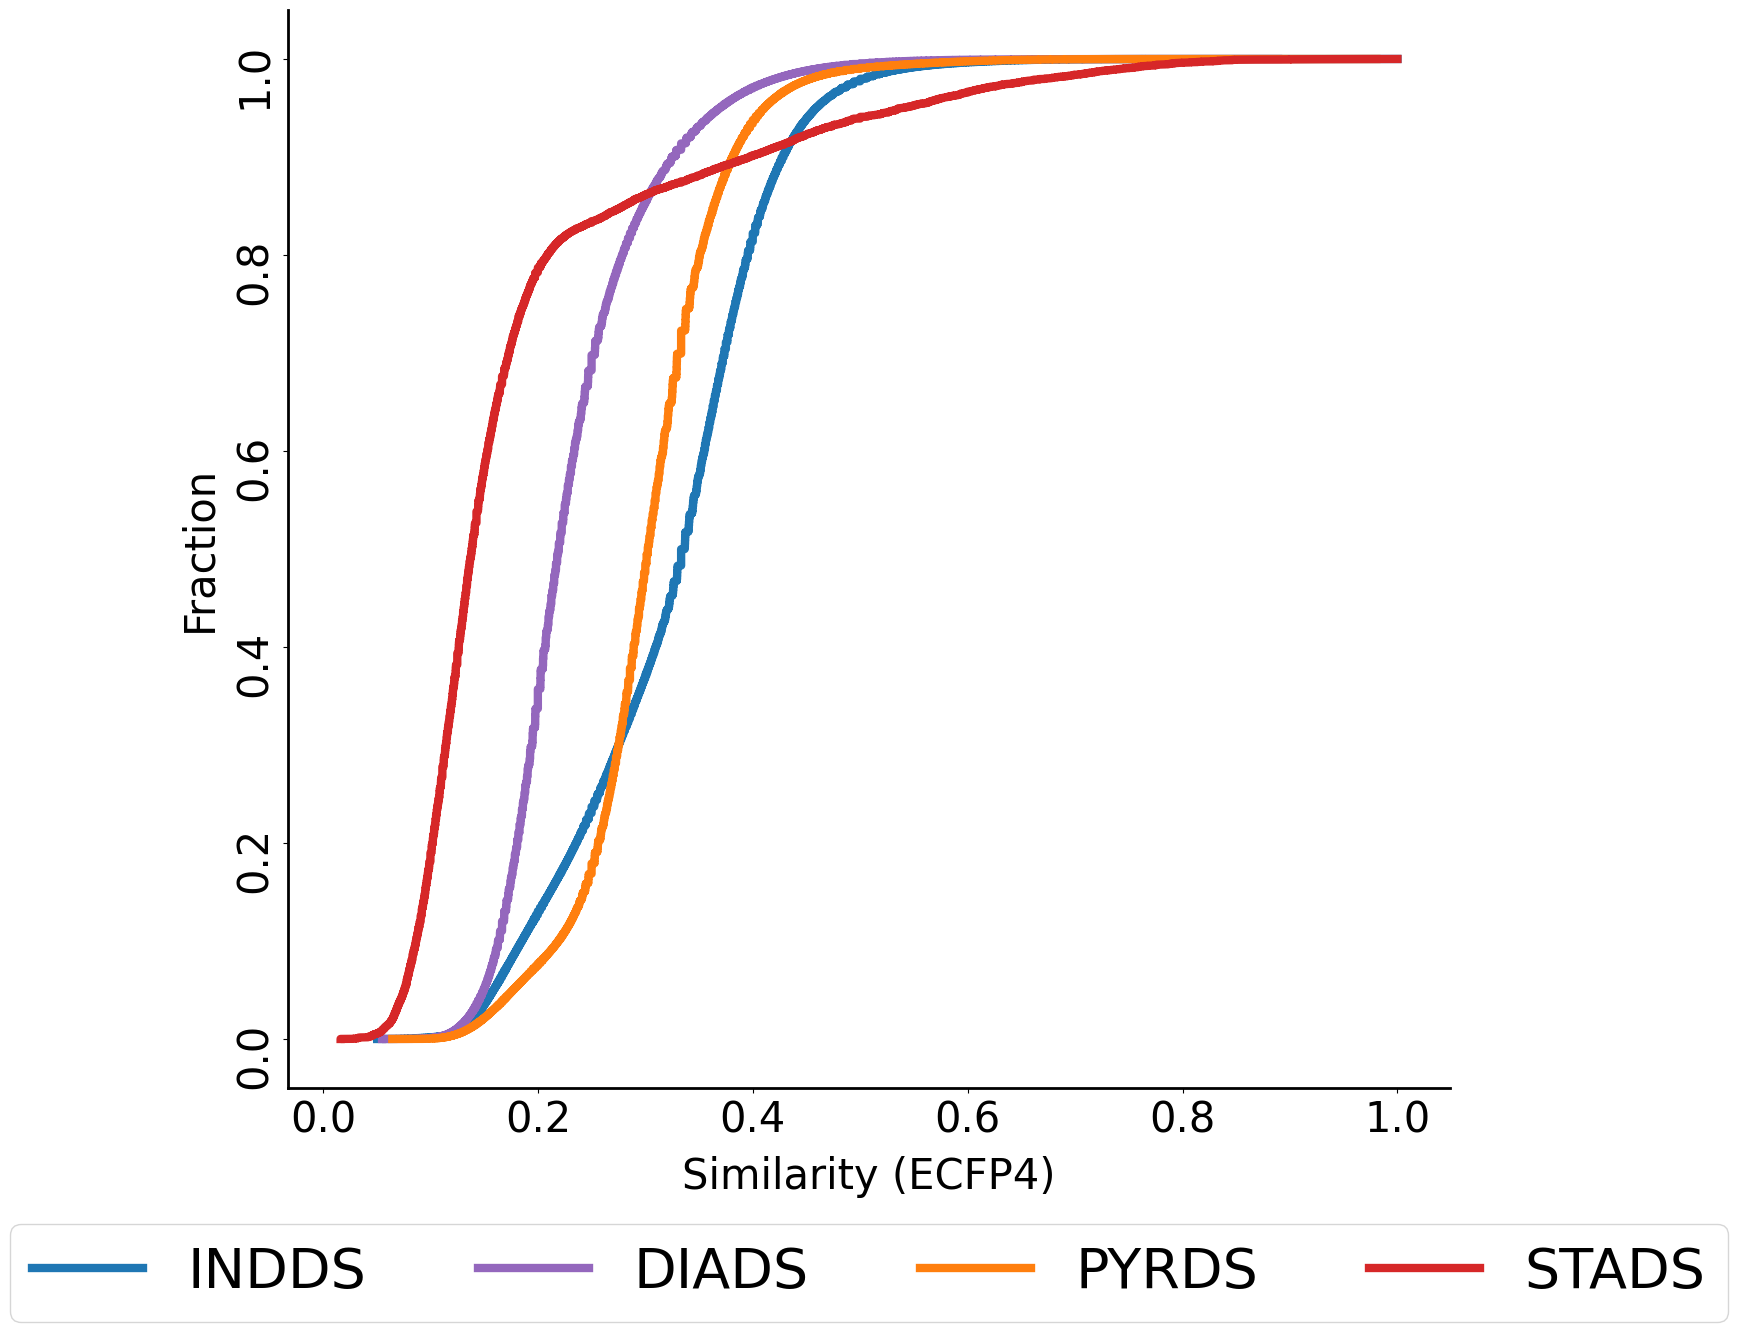

In [27]:
plt.figure(figsize=(15, 14))
# Figure 2 - ECFP4
plt.plot(SimECFP4_INDDB, proportionECFP4_INDDB, label="INDDS", c="#1f77b4", lw = 6, linestyle = "-")
plt.plot(SimECFP4_DIADB, proportionECFP4_DIADB, label="DIADS", c="#9467bd", lw = 6, linestyle = "-")
plt.plot(SimECFP4_PYRDB, proportionECFP4_PYRDB, label="PYRDS", c="#ff7f0e", lw = 6, linestyle = "-")
plt.plot(SimECFP4_SADB, proportionECFP4_SADB, label="STADS", c="#d62728", lw = 6, linestyle = "-")

plt.xlabel('Similarity (ECFP4)', fontsize=30, labelpad = 10)
plt.ylabel('Fraction', fontsize=30, labelpad = 10)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(2.0)

ax.tick_params(axis='both', which='major', pad=5)

plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=90, fontsize=30)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol = 4, fontsize=40)
plt.savefig('diversity_ecfp4.png', bbox_inches = 'tight', pad_inches = 0, dpi = 400)

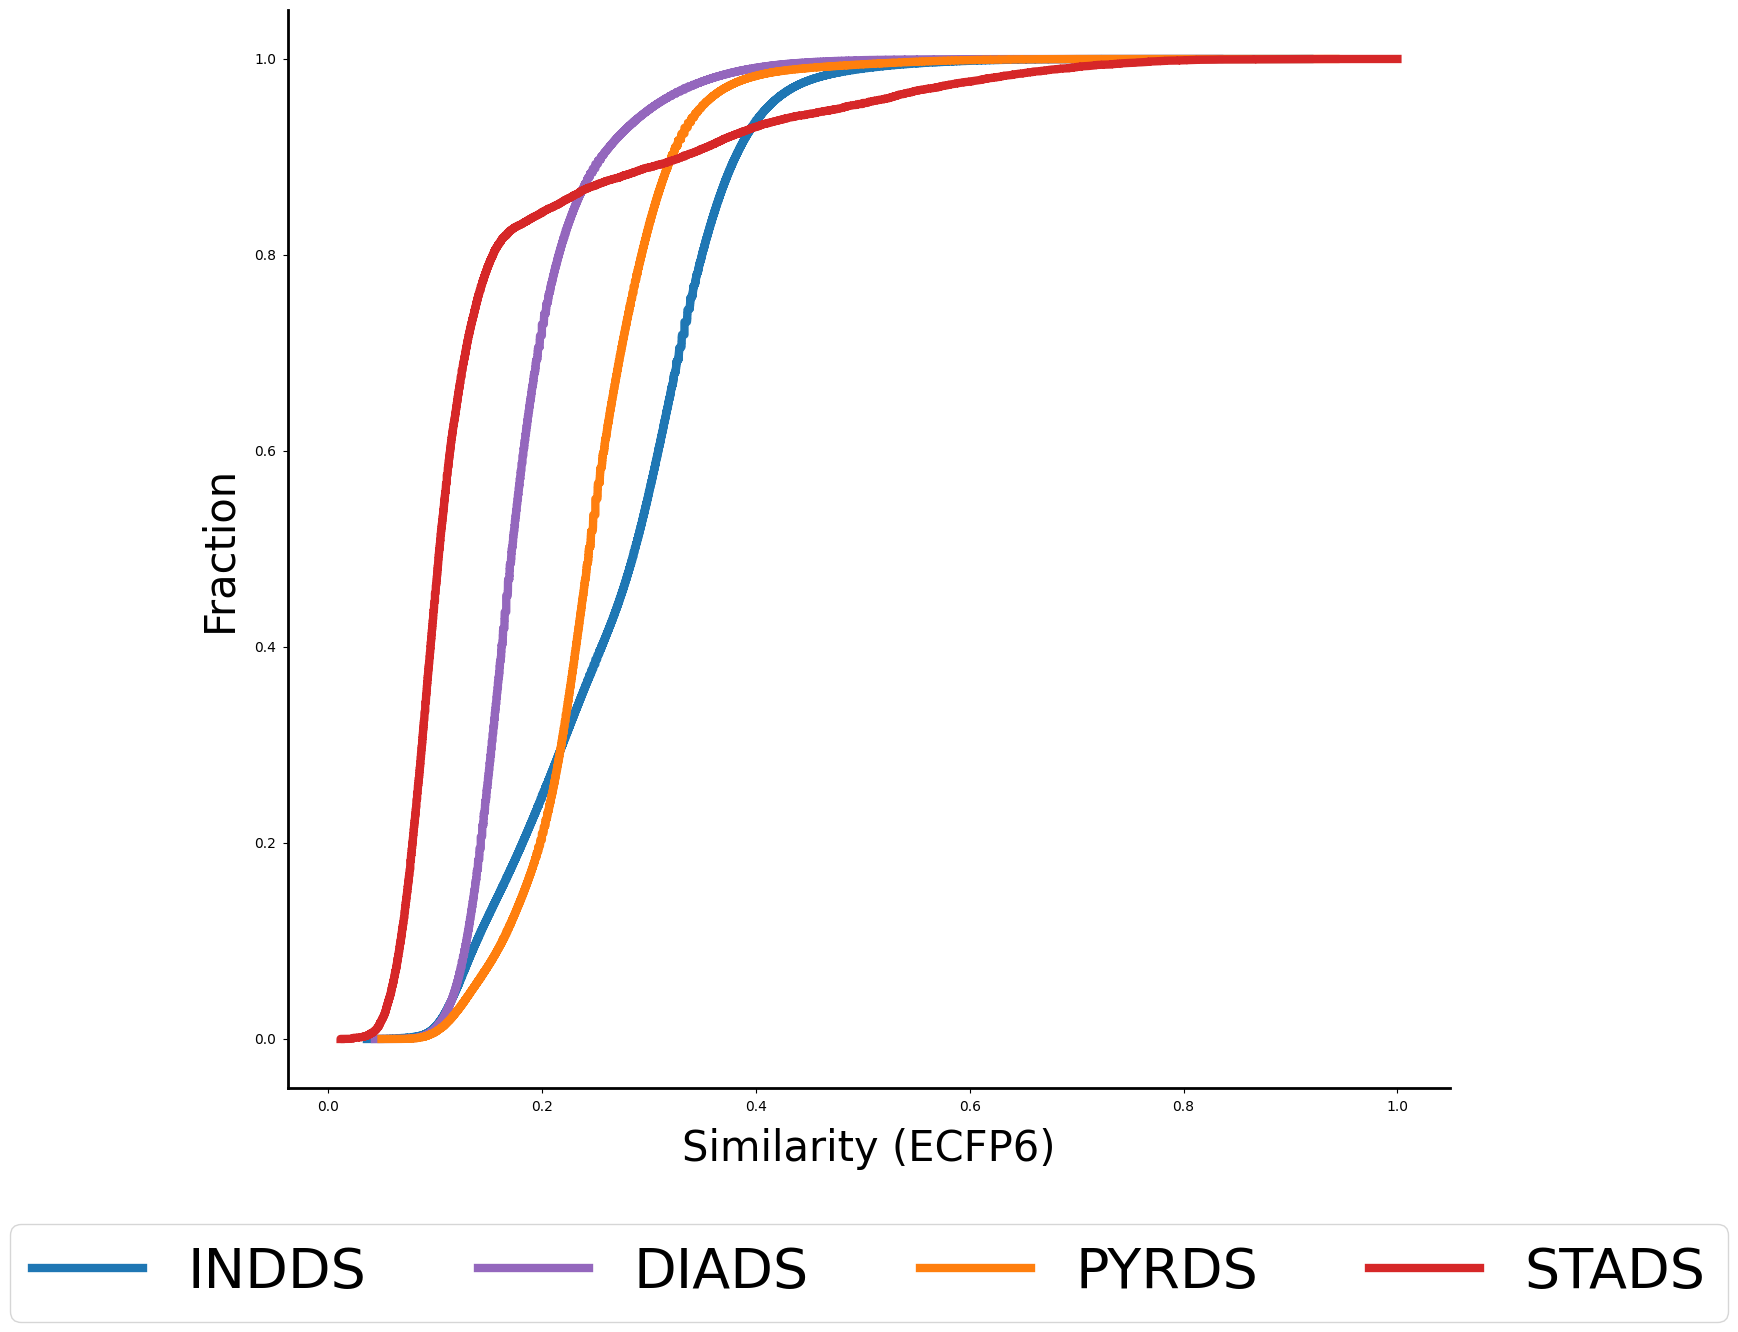

In [28]:

# Figure 3 - ECFP6
plt.figure(figsize=(15, 14))
plt.plot(SimECFP6_INDDB, proportionECFP6_INDDB, label="INDDS", c="#1f77b4", lw = 6, linestyle = "-")
plt.plot(SimECFP6_DIADB, proportionECFP6_DIADB, label="DIADS", c="#9467bd", lw = 6, linestyle = "-")
plt.plot(SimECFP6_PYRDB, proportionECFP6_PYRDB, label="PYRDS", c="#ff7f0e", lw = 6, linestyle = "-")
plt.plot(SimECFP6_SADB, proportionECFP6_SADB, label="STADS", c="#d62728", lw = 6, linestyle = "-")


plt.xlabel('Similarity (ECFP6)', fontsize=30, labelpad = 10)
plt.ylabel('Fraction', fontsize=30, labelpad = 10)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(2.0)

ax.tick_params(axis='both', which='major', pad=5)


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol = 4, fontsize=40)

plt.savefig('diversity_ecfp6.png', bbox_inches = 'tight', pad_inches = 0, dpi = 400)

## **Compute stats**

In [30]:
# MACCS-keys statistics for INDDB, PYRDB, DIADB, and SADB
maccs_inddb = pd.DataFrame(SimMACCS_INDDB, columns=['MACCS_INDDB'])
maccs_inddb = maccs_inddb.describe()

maccs_pyrdb = pd.DataFrame(SimMACCS_PYRDB, columns=['MACCS_PYRDB'])
maccs_pyrdb = maccs_pyrdb.describe()

maccs_diadb = pd.DataFrame(SimMACCS_DIADB, columns=['MACCS_DIADB'])
maccs_diadb = maccs_diadb.describe()

maccs_sadb = pd.DataFrame(SimMACCS_SADB, columns=['MACCS_SADB'])
maccs_sadb = maccs_sadb.describe()

# ECFP4 statistics for INDDB, PYRDB, DIADB, and SADB
ecfp4_inddb = pd.DataFrame(SimECFP4_INDDB, columns=['ECFP4_INDDB'])
ecfp4_inddb = ecfp4_inddb.describe()

ecfp4_pyrdb = pd.DataFrame(SimECFP4_PYRDB, columns=['ECFP4_PYRDB'])
ecfp4_pyrdb = ecfp4_pyrdb.describe()

ecfp4_diadb = pd.DataFrame(SimECFP4_DIADB, columns=['ECFP4_DIADB'])
ecfp4_diadb = ecfp4_diadb.describe()

ecfp4_sadb = pd.DataFrame(SimECFP4_SADB, columns=['ECFP4_SADB'])
ecfp4_sadb = ecfp4_sadb.describe()

# ECFP6 statistics for INDDB, PYRDB, DIADB, and SADB
ecfp6_inddb = pd.DataFrame(SimECFP6_INDDB, columns=['ECFP6_INDDB'])
ecfp6_inddb = ecfp6_inddb.describe()

ecfp6_pyrdb = pd.DataFrame(SimECFP6_PYRDB, columns=['ECFP6_PYRDB'])
ecfp6_pyrdb = ecfp6_pyrdb.describe()

ecfp6_diadb = pd.DataFrame(SimECFP6_DIADB, columns=['ECFP6_DIADB'])
ecfp6_diadb = ecfp6_diadb.describe()

ecfp6_sadb = pd.DataFrame(SimECFP6_SADB, columns=['ECFP6_SADB'])
ecfp6_sadb = ecfp6_sadb.describe()

# Concatenating all statistics
data = pd.concat([maccs_inddb, maccs_pyrdb, maccs_diadb, maccs_sadb,
                  ecfp4_inddb, ecfp4_pyrdb, ecfp4_diadb, ecfp4_sadb,
                  ecfp6_inddb, ecfp6_pyrdb, ecfp6_diadb, ecfp6_sadb
                 ], axis=1)

# Display the final DataFrame
print(data)


        MACCS_INDDB   MACCS_PYRDB   MACCS_DIADB    MACCS_SADB   ECFP4_INDDB  \
count  1.249750e+07  1.249750e+07  1.249750e+07  23436.000000  1.249750e+07   
mean   6.938933e-01  6.721917e-01  5.826693e-01      0.472530  3.217923e-01   
std    8.133501e-02  8.278210e-02  1.024758e-01      0.178075  9.282529e-02   
min    2.716049e-01  3.108108e-01  2.222222e-01      0.019608  5.042017e-02   
25%    6.400000e-01  6.164384e-01  5.074627e-01      0.337662  2.558140e-01   
50%    6.944444e-01  6.712329e-01  5.753425e-01      0.457729  3.366337e-01   
75%    7.500000e-01  7.272727e-01  6.507937e-01      0.594595  3.837209e-01   
max    1.000000e+00  1.000000e+00  1.000000e+00      1.000000  1.000000e+00   

        ECFP4_PYRDB   ECFP4_DIADB    ECFP4_SADB   ECFP6_INDDB   ECFP6_PYRDB  \
count  1.249750e+07  1.249750e+07  23436.000000  1.249750e+07  1.249750e+07   
mean   3.028609e-01  2.337664e-01      0.187149  2.737048e-01  2.462427e-01   
std    6.913844e-02  6.890928e-02      0.143324  9.

In [31]:
data = data.round(3)

In [32]:
data

MACCS_INDDB   MACCS_PYRDB   MACCS_DIADB  MACCS_SADB   ECFP4_INDDB  \
count  1.249750e+07  1.249750e+07  1.249750e+07   23436.000  1.249750e+07   
mean   6.940000e-01  6.720000e-01  5.830000e-01       0.473  3.220000e-01   
std    8.100000e-02  8.300000e-02  1.020000e-01       0.178  9.300000e-02   
min    2.720000e-01  3.110000e-01  2.220000e-01       0.020  5.000000e-02   
25%    6.400000e-01  6.160000e-01  5.070000e-01       0.338  2.560000e-01   
50%    6.940000e-01  6.710000e-01  5.750000e-01       0.458  3.370000e-01   
75%    7.500000e-01  7.270000e-01  6.510000e-01       0.595  3.840000e-01   
max    1.000000e+00  1.000000e+00  1.000000e+00       1.000  1.000000e+00   

        ECFP4_PYRDB   ECFP4_DIADB  ECFP4_SADB   ECFP6_INDDB   ECFP6_PYRDB  \
count  1.249750e+07  1.249750e+07   23436.000  1.249750e+07  1.249750e+07   
mean   3.030000e-01  2.340000e-01       0.187  2.740000e-01  2.460000e-01   
std    6.900000e-02  6.900000e-02       0.143  9.300000e-02  6.600000e-02   
min    6.500000e-02  5.500000e-02       0.016  3.600000e-02  5.000000e-02   
25%    2.670000e-01  1.880000e-01       0.108  2.010000e-01  2.100000e-01   
50%    3.020000e-01  2.200000e-01       0.139  2.870000e-01  2.440000e-01   
75%    3.410000e-01  2.640000e-01       0.187  3.390000e-01  2.830000e-01   
max    9.800000e-01  8.890000e-01       1.000  9.180000e-01  9.420000e-01   

        ECFP6_DIADB  ECFP6_SADB  
count  1.249750e+07   23436.000  
mean   1.850000e-01       0.150  
std    5.800000e-02       0.132  
min    4.400000e-02       0.012  
25%    1.480000e-01       0.083  
50%    1.720000e-01       0.104  
75%    2.040000e-01       0.139  
max    8.330000e-01       1.000

In [33]:
data.to_csv("similarity_maccs_ecfp_saureus_transrules.csv", index=True)

In [34]:
statistics = pd.read_csv("similarity_maccs_ecfp_saureus_transrules.csv")
statistics

Unnamed: 0   MACCS_INDDB   MACCS_PYRDB   MACCS_DIADB  MACCS_SADB  \
0      count  1.249750e+07  1.249750e+07  1.249750e+07   23436.000   
1       mean  6.940000e-01  6.720000e-01  5.830000e-01       0.473   
2        std  8.100000e-02  8.300000e-02  1.020000e-01       0.178   
3        min  2.720000e-01  3.110000e-01  2.220000e-01       0.020   
4        25%  6.400000e-01  6.160000e-01  5.070000e-01       0.338   
5        50%  6.940000e-01  6.710000e-01  5.750000e-01       0.458   
6        75%  7.500000e-01  7.270000e-01  6.510000e-01       0.595   
7        max  1.000000e+00  1.000000e+00  1.000000e+00       1.000   

    ECFP4_INDDB   ECFP4_PYRDB   ECFP4_DIADB  ECFP4_SADB   ECFP6_INDDB  \
0  1.249750e+07  1.249750e+07  1.249750e+07   23436.000  1.249750e+07   
1  3.220000e-01  3.030000e-01  2.340000e-01       0.187  2.740000e-01   
2  9.300000e-02  6.900000e-02  6.900000e-02       0.143  9.300000e-02   
3  5.000000e-02  6.500000e-02  5.500000e-02       0.016  3.600000e-02   
4  2.560000e-01  2.670000e-01  1.880000e-01       0.108  2.010000e-01   
5  3.370000e-01  3.020000e-01  2.200000e-01       0.139  2.870000e-01   
6  3.840000e-01  3.410000e-01  2.640000e-01       0.187  3.390000e-01   
7  1.000000e+00  9.800000e-01  8.890000e-01       1.000  9.180000e-01   

    ECFP6_PYRDB   ECFP6_DIADB  ECFP6_SADB  
0  1.249750e+07  1.249750e+07   23436.000  
1  2.460000e-01  1.850000e-01       0.150  
2  6.600000e-02  5.800000e-02       0.132  
3  5.000000e-02  4.400000e-02       0.012  
4  2.100000e-01  1.480000e-01       0.083  
5  2.440000e-01  1.720000e-01       0.104  
6  2.830000e-01  2.040000e-01       0.139  
7  9.420000e-01  8.330000e-01       1.000

In [35]:
statistics.columns

Index(['Unnamed: 0', 'MACCS_INDDB', 'MACCS_PYRDB', 'MACCS_DIADB', 'MACCS_SADB',
       'ECFP4_INDDB', 'ECFP4_PYRDB', 'ECFP4_DIADB', 'ECFP4_SADB',
       'ECFP6_INDDB', 'ECFP6_PYRDB', 'ECFP6_DIADB', 'ECFP6_SADB'],
      dtype='object')

In [36]:
statistics.columns = [
                    'statistics', 'MACCS_inddb', 'MACCS_pyrdb', 'MACCS_diadb', 'MACCS_sadb', 
                    'ECFP4_inddb', 'ECFP4_pyrdb', 'ECFP4_diadb', 'ECFP4_sadb', 
                    'ECFP6_inddb', 'ECFP6_pyrdb', 'ECFP6_diadb', 'ECFP6_sadb'
                    ]

In [37]:
statistics

statistics   MACCS_inddb   MACCS_pyrdb   MACCS_diadb  MACCS_sadb  \
0      count  1.249750e+07  1.249750e+07  1.249750e+07   23436.000   
1       mean  6.940000e-01  6.720000e-01  5.830000e-01       0.473   
2        std  8.100000e-02  8.300000e-02  1.020000e-01       0.178   
3        min  2.720000e-01  3.110000e-01  2.220000e-01       0.020   
4        25%  6.400000e-01  6.160000e-01  5.070000e-01       0.338   
5        50%  6.940000e-01  6.710000e-01  5.750000e-01       0.458   
6        75%  7.500000e-01  7.270000e-01  6.510000e-01       0.595   
7        max  1.000000e+00  1.000000e+00  1.000000e+00       1.000   

    ECFP4_inddb   ECFP4_pyrdb   ECFP4_diadb  ECFP4_sadb   ECFP6_inddb  \
0  1.249750e+07  1.249750e+07  1.249750e+07   23436.000  1.249750e+07   
1  3.220000e-01  3.030000e-01  2.340000e-01       0.187  2.740000e-01   
2  9.300000e-02  6.900000e-02  6.900000e-02       0.143  9.300000e-02   
3  5.000000e-02  6.500000e-02  5.500000e-02       0.016  3.600000e-02   
4  2.560000e-01  2.670000e-01  1.880000e-01       0.108  2.010000e-01   
5  3.370000e-01  3.020000e-01  2.200000e-01       0.139  2.870000e-01   
6  3.840000e-01  3.410000e-01  2.640000e-01       0.187  3.390000e-01   
7  1.000000e+00  9.800000e-01  8.890000e-01       1.000  9.180000e-01   

    ECFP6_pyrdb   ECFP6_diadb  ECFP6_sadb  
0  1.249750e+07  1.249750e+07   23436.000  
1  2.460000e-01  1.850000e-01       0.150  
2  6.600000e-02  5.800000e-02       0.132  
3  5.000000e-02  4.400000e-02       0.012  
4  2.100000e-01  1.480000e-01       0.083  
5  2.440000e-01  1.720000e-01       0.104  
6  2.830000e-01  2.040000e-01       0.139  
7  9.420000e-01  8.330000e-01       1.000

In [38]:
stat = list(statistics["statistics"])

In [39]:
array = statistics.to_numpy()
print(array)

[['count' 12497500.0 12497500.0 12497500.0 23436.0 12497500.0 12497500.0
  12497500.0 23436.0 12497500.0 12497500.0 12497500.0 23436.0]
 ['mean' 0.694 0.672 0.583 0.473 0.322 0.303 0.234 0.187 0.274 0.246
  0.185 0.15]
 ['std' 0.081 0.083 0.102 0.178 0.093 0.069 0.069 0.143 0.093 0.066 0.058
  0.132]
 ['min' 0.272 0.311 0.222 0.02 0.05 0.065 0.055 0.016 0.036 0.05 0.044
  0.012]
 ['25%' 0.64 0.616 0.507 0.338 0.256 0.267 0.188 0.108 0.201 0.21 0.148
  0.083]
 ['50%' 0.694 0.671 0.575 0.458 0.337 0.302 0.22 0.139 0.287 0.244 0.172
  0.104]
 ['75%' 0.75 0.727 0.651 0.595 0.384 0.341 0.264 0.187 0.339 0.283 0.204
  0.139]
 ['max' 1.0 1.0 1.0 1.0 1.0 0.98 0.889 1.0 0.918 0.942 0.833 1.0]]


In [40]:
array = np.transpose(array)
print(array)

[['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
 [12497500.0 0.694 0.081 0.272 0.64 0.694 0.75 1.0]
 [12497500.0 0.672 0.083 0.311 0.616 0.671 0.727 1.0]
 [12497500.0 0.583 0.102 0.222 0.507 0.575 0.651 1.0]
 [23436.0 0.473 0.178 0.02 0.338 0.458 0.595 1.0]
 [12497500.0 0.322 0.093 0.05 0.256 0.337 0.384 1.0]
 [12497500.0 0.303 0.069 0.065 0.267 0.302 0.341 0.98]
 [12497500.0 0.234 0.069 0.055 0.188 0.22 0.264 0.889]
 [23436.0 0.187 0.143 0.016 0.108 0.139 0.187 1.0]
 [12497500.0 0.274 0.093 0.036 0.201 0.287 0.339 0.918]
 [12497500.0 0.246 0.066 0.05 0.21 0.244 0.283 0.942]
 [12497500.0 0.185 0.058 0.044 0.148 0.172 0.204 0.833]
 [23436.0 0.15 0.132 0.012 0.083 0.104 0.139 1.0]]


In [41]:
df = pd.DataFrame(array, columns=stat)
df

count   mean    std    min    25%    50%    75%    max
0        count   mean    std    min    25%    50%    75%    max
1   12497500.0  0.694  0.081  0.272   0.64  0.694   0.75    1.0
2   12497500.0  0.672  0.083  0.311  0.616  0.671  0.727    1.0
3   12497500.0  0.583  0.102  0.222  0.507  0.575  0.651    1.0
4      23436.0  0.473  0.178   0.02  0.338  0.458  0.595    1.0
5   12497500.0  0.322  0.093   0.05  0.256  0.337  0.384    1.0
6   12497500.0  0.303  0.069  0.065  0.267  0.302  0.341   0.98
7   12497500.0  0.234  0.069  0.055  0.188   0.22  0.264  0.889
8      23436.0  0.187  0.143  0.016  0.108  0.139  0.187    1.0
9   12497500.0  0.274  0.093  0.036  0.201  0.287  0.339  0.918
10  12497500.0  0.246  0.066   0.05   0.21  0.244  0.283  0.942
11  12497500.0  0.185  0.058  0.044  0.148  0.172  0.204  0.833
12     23436.0   0.15  0.132  0.012  0.083  0.104  0.139    1.0

In [42]:
df2 = df.iloc[1:]
df2 = df2.reset_index(drop=True)
df2

count   mean    std    min    25%    50%    75%    max
0   12497500.0  0.694  0.081  0.272   0.64  0.694   0.75    1.0
1   12497500.0  0.672  0.083  0.311  0.616  0.671  0.727    1.0
2   12497500.0  0.583  0.102  0.222  0.507  0.575  0.651    1.0
3      23436.0  0.473  0.178   0.02  0.338  0.458  0.595    1.0
4   12497500.0  0.322  0.093   0.05  0.256  0.337  0.384    1.0
5   12497500.0  0.303  0.069  0.065  0.267  0.302  0.341   0.98
6   12497500.0  0.234  0.069  0.055  0.188   0.22  0.264  0.889
7      23436.0  0.187  0.143  0.016  0.108  0.139  0.187    1.0
8   12497500.0  0.274  0.093  0.036  0.201  0.287  0.339  0.918
9   12497500.0  0.246  0.066   0.05   0.21  0.244  0.283  0.942
10  12497500.0  0.185  0.058  0.044  0.148  0.172  0.204  0.833
11     23436.0   0.15  0.132  0.012  0.083  0.104  0.139    1.0

In [43]:
df2["data_set"] = ['MACCS_inddb', 'MACCS_pyrdb', 'MACCS_diadb', 'MACCS_sadb', 
                   'ECFP4_inddb', 'ECFP4_pyrdb', 'ECFP4_diadb', 'ECFP4_sadb', 
                   'ECFP6_inddb', 'ECFP6_pyrdb', 'ECFP6_diadb', 'ECFP6_sadb']

In [44]:
df2 = df2[['data_set','count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
df2

data_set       count   mean    std    min    25%    50%    75%    max
0   MACCS_inddb  12497500.0  0.694  0.081  0.272   0.64  0.694   0.75    1.0
1   MACCS_pyrdb  12497500.0  0.672  0.083  0.311  0.616  0.671  0.727    1.0
2   MACCS_diadb  12497500.0  0.583  0.102  0.222  0.507  0.575  0.651    1.0
3    MACCS_sadb     23436.0  0.473  0.178   0.02  0.338  0.458  0.595    1.0
4   ECFP4_inddb  12497500.0  0.322  0.093   0.05  0.256  0.337  0.384    1.0
5   ECFP4_pyrdb  12497500.0  0.303  0.069  0.065  0.267  0.302  0.341   0.98
6   ECFP4_diadb  12497500.0  0.234  0.069  0.055  0.188   0.22  0.264  0.889
7    ECFP4_sadb     23436.0  0.187  0.143  0.016  0.108  0.139  0.187    1.0
8   ECFP6_inddb  12497500.0  0.274  0.093  0.036  0.201  0.287  0.339  0.918
9   ECFP6_pyrdb  12497500.0  0.246  0.066   0.05   0.21  0.244  0.283  0.942
10  ECFP6_diadb  12497500.0  0.185  0.058  0.044  0.148  0.172  0.204  0.833
11   ECFP6_sadb     23436.0   0.15  0.132  0.012  0.083  0.104  0.139    1.0

In [45]:
df2.to_excel("similarity_maccs_ecfp_clean_saureus_transrules.xlsx", index=True)

https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python